# Habbakuk PAGES

['Alef', 'Ayin', 'Bet', 'Dalet', 'Gimel', 'He', 'Het', 'Kaf', 'Kaf-final', 'Lamed', 'Mem', 'Mem-medial', 'Nun-final', 'Nun-medial', 'Pe', 'Pe-final', 'Qof', 'Resh', 'Samekh', 'Shin', 'Taw', 'Tet', 'Tsadi-final', 'Tsadi-medial', 'Waw', 'Yod', 'Zayin']
example generated page of Habbakuk text:


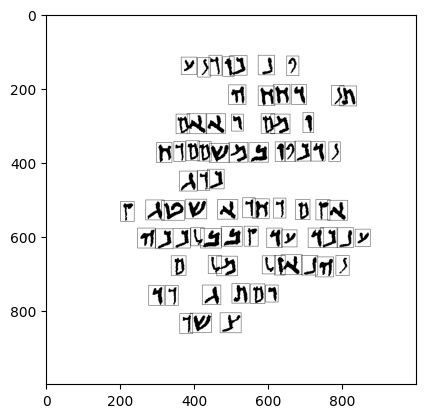

In [1]:
from data_management.augmentation.habbakukGenerator import create_word_page, pageImageWarper, visualiseImage, saveImageAndAnnotations, habbakukClasses


# these are the letter classes
print(habbakukClasses)

# makes one sample image
img, BB, CHARACTERS = create_word_page()  
# warps it (using sin waves, basically)
img_output, newBBs = pageImageWarper(img, BB)


print("example generated page of Habbakuk text:")
# a function that plots the image, with the option of the BBs as well
visualiseImage(img_output, newBBs, showBBs=True)


In [6]:
import os

N = 5  # amount of pages

outputFolder = "Data/Habbakuk_Pages"
os.makedirs(outputFolder, exist_ok = True)

image_final_dir = "Data/Habbakuk_Pages/images/"
os.makedirs(image_final_dir, exist_ok = True)

label_final_dir = "Data/Habbakuk_Pages/labels/"
os.makedirs(label_final_dir, exist_ok = True)

### Generate the dataset

In [7]:
from tqdm import tqdm

for i in tqdm(range(N)):
    # generate a random page of text
    img, BB, CHARACTERS = create_word_page()  

    # warp the page of text a bit
    img_output, newBBs = pageImageWarper(img, BB)  

    saveImageAndAnnotations(img_output, newBBs, CHARACTERS, img_path=image_final_dir, label_path=label_final_dir, name=i)

100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


### Use the dataset

In [5]:
from data_management.loadHabbakuk import habbakukPagesDataset
from data_management.datasetSplitter import datasetSplitter

# outputFolder = "Habbakuk_Pages" # (from above)
# options on whether or not you want the labels and/or the BBs (both false also works)
dataset = habbakukPagesDataset(folder_path=outputFolder, returnLabels=True,  returnBBs=True)

train_loader, validation_loader = datasetSplitter(dataset, batch_size=1, validation_split=0.2)

# do stuff

# Habbakuk LETTERS

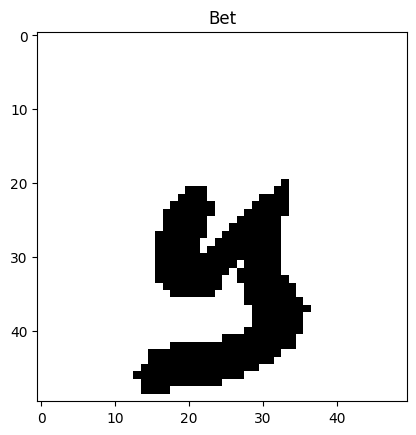

In [6]:
from data_management.augmentation.habbakukGenerator import habbakukClasses, create_letter_image, letterImageWarper, HabbakukLettersGenerator
import matplotlib.pyplot as plt
import random

# pick a random letter to generate
letter = random.choice(list(habbakukClasses))

img = create_letter_image(letter, (50,50)) # generate the image
img = letterImageWarper(img) # warp it a bit (randomly)

plt.imshow(img, cmap='gray')
plt.title(letter)
plt.show()

In [7]:
# make the dataset folder
outputFolder = "Data"
os.makedirs(outputFolder, exist_ok = True)

outputFolder = "Data/Habbakuk_Letters"
os.makedirs(outputFolder, exist_ok = True)


### Generate the dataset

In [8]:
N = 10 # this will probably need to be more...

# generate N images per class
HabbakukLettersGenerator(outputFolder, N=N)

### Use the dataset

In [13]:
from data_management.loadHabbakuk import habbakukLettersDataset
from data_management.datasetSplitter import datasetSplitter

# outputFolder = "Habbakuk_Pages" # (from above)
# options on whether or not you want the labels and/or the BBs (both false also works)
dataset = habbakukLettersDataset(folder_path=outputFolder)

train_loader, validation_loader = datasetSplitter(dataset, batch_size=1, validation_split=0.2)
